Button(description='Next Iteration', icon='check', style=ButtonStyle(), tooltip='Next Iteration')

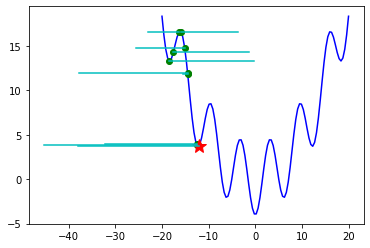

In [2]:
#File: pso_wikipedia.ipynb
#Example of PSO based on the wikipedia entry
#Dr. Jorge Luis Rosas Trigueros
#Last modification: 12 oct 2021 16:55 

import ipywidgets as widgets
from IPython import display as display

import matplotlib.pyplot as plt
import numpy as np

def create_button():
  button = widgets.Button(
    description='Next Iteration',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Next Iteration',
    icon='check' # (FontAwesome names without the `fa-` prefix)
  )
  return button

lower_limit=-20
upper_limit=20

n_particles=10
n_dimensions=1


def f(x):
    return 0.05*x*x-4*np.cos(x)


# Initialize the particle positions and their velocities
#X = lower_limit + (upper_limit - lower_limit) * np.random.rand(n_particles, n_dimensions) 
#Bias the initial population
X = lower_limit + 0.25*(upper_limit - lower_limit) * np.random.rand(n_particles, n_dimensions) 
assert X.shape == (n_particles, n_dimensions)
# V = np.zeros(X.shape)
V = -(upper_limit - lower_limit)/2+(upper_limit - lower_limit)*np.random.rand(n_particles, n_dimensions)
 
# Initialize the global and local fitness to the worst possible
fitness_gbest = np.inf
fitness_lbest = fitness_gbest * np.ones(n_particles)

X_lbest=1*X
X_gbest=1*X_lbest[0]

fitness_X = np.zeros(X.shape)

for I in range(0, n_particles):
    if f(X_lbest[I])<f(X_gbest):
        X_gbest=1*X_lbest[I]

count=0

def iteration(b):
    global count
    global X,X_lbest,X_gbest,V

# Loop until convergence, in this example a finite number of iterations chosen
    weight=0.5
    C1=0.3

    C2=0.2
 
    display.clear_output(wait=True)
    display.display(button)
    count+=1

    print (count,"Best particle in:",X_gbest," gbest: ",f(X_gbest))

    # Update the particle velocity and position
    for I in range(0, n_particles):
        for J in range(0, n_dimensions):
          R1 = np.random.rand()#uniform_random_number()
          R2 = np.random.rand()#uniform_random_number()
          V[I][J] = (weight*V[I][J]
                    + C1*R1*(X_lbest[I][J] - X[I][J]) 
                    + C2*R2*(X_gbest[J] - X[I][J]))
          X[I][J] = X[I][J] + V[I][J]
        if f(X[I])<f(X_lbest[I]):
            X_lbest[I]=1*X[I]
            if f(X_lbest[I])<f(X_gbest):
                X_gbest=1*X_lbest[I]
          
    graph_f()
    graph_population(X,V)

global_fig = plt.figure()
ax = plt.axes()

def graph_f():
    xini=-20.
    xfin=20.
    x=np.linspace(xini,xfin,100)
    y=list(map(f,x))
    plt.plot(x,y,'b')

def graph_population(X,V):
    y=list(map(f,X[:,0]))

    graph_f()
    plt.plot(X[:,0],y,'go')
    plt.plot(X_gbest,f(X_gbest),'r*',markersize=15)
    for i in range(n_particles):
      x=X[i]
      v=V[i]
      plt.plot([x,x+2*v],[y[i],y[i]],'c')

button=create_button()
button.on_click(iteration)
display.display(button)

graph_population(X,V)
